In [1]:
!pip install pandas requests textblob wordcloud newsapi haversine
#TODO: VSCode requires the use of % instead of !. This should be changed back before submission.
#CHANGE: Added Haversine for my portion. Haversine is a package used to measure distance between coordinates.
import requests #downloads zip file from webpage
import pandas as pd
import matplotlib.pyplot as plt
import zipfile #extracts csv from zip
import io #allows treat downloaded data as a file object
import seaborn as sns
from textblob import TextBlob # will be used to analyse news from the internet
#TODO: This line does not work in VSCode, might work in Colab. Should check before submitting.
#New code from  https://github.com/mattlisiv/newsapi-python/issues/5#issuecomment-448281100
#from newsapi import NewsApiClient # will be used to extract latests articles
from newsapi.newsapi_client import NewsApiClient # will be used to extract latests articles (Replaces previous line)
from wordcloud import WordCloud # to create a word cloud of words mostly used in the articles
from haversine import haversine, Unit #to measure distance between Capital Bikeshare stations and public transit stations
import numpy as np # need this for median

In [3]:
#old libraries - Nataliia
#!pip install pandas requests 
#!pip install textblob
#!pip install wordcloud
#import requests #downloads zip file from webpage
#import pandas as pd
#import matplotlib.pyplot as plt
#import zipfile #extracts csv from zip
#import io #allows treat downloaded data as a file object
#import seaborn as sns
#from textblob import TextBlob # will be used to analyse news from the internet
#from newsapi import NewsApiClient # will be used to extract latests articles
#from wordcloud import WordCloud # to create a word cloud of words mostly used in the articles

In [66]:
web = ['https://s3.amazonaws.com/capitalbikeshare-data/202005-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202006-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202007-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202008-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202009-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202010-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202011-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202012-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202101-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202102-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202103-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202104-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202105-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202106-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202107-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202108-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202109-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202110-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202111-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202112-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202201-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202202-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202203-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202204-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202205-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202206-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202207-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202208-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202209-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202210-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202211-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202212-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202301-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202302-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202303-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202304-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202305-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202306-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202307-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202308-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202309-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202310-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202311-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202312-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202401-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202402-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202403-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202404-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202405-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202406-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202407-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202408-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202409-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202410-capitalbikeshare-tripdata.zip', 
       'https://s3.amazonaws.com/capitalbikeshare-data/202411-capitalbikeshare-tripdata.zip',
      ]
   
df_list = [] #adding each file as a dataframe to a list

In [68]:
for url in web:
    response = requests.get(url) #downloaded zip file from web
    if response.status_code == 200:
        with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file: #extracting the data
            for filename in zip_file.namelist():
                #if filename.endwith('.csv'):
                with zip_file.open(filename) as f:
                    df_1 = pd.read_csv(f, encoding='ISO-8859-1', low_memory=False) # there was some error in the columns (missmatch of value types)
                    df_list.append(df_1)
    else:
        print(f'Failed to download the ZIP file from {url} . Status code ', response.status_code)
df = pd.concat(df_list, ignore_index = True)
print(df)

                   ride_id  rideable_type               started_at  \
0         946D42AD89539210    docked_bike      2020-05-30 17:25:29   
1         CC46FAAB662B8613    docked_bike      2020-05-09 14:42:04   
2         72F00B2FB833D6ED    docked_bike      2020-05-24 17:27:19   
3         4DFBE6AED989DF35    docked_bike      2020-05-27 15:29:52   
4         1AAFE6B4331AB9DF    docked_bike      2020-05-31 14:06:03   
...                    ...            ...                      ...   
18034462  E530BA648701560A  electric_bike  2024-11-18 07:40:38.653   
18034463  D5752897D58E2CCC  electric_bike  2024-11-12 16:13:11.102   
18034464  69294E4C8958A8EF  electric_bike  2024-11-15 19:34:16.506   
18034465  8798FC5FBE03EC63  electric_bike  2024-11-16 10:08:49.577   
18034466  62417D1E773A1AB1  electric_bike  2024-11-08 15:45:07.334   

                         ended_at  \
0             2020-05-31 18:25:22   
1             2020-05-09 15:06:33   
2             2020-05-24 17:43:51   
3          

In [69]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual,NaN,NaN,NaN
1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member,NaN,NaN,NaN
2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member,NaN,NaN,NaN
3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual,NaN,NaN,NaN
4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual,NaN,NaN,NaN


In [70]:
df['Unnamed: 0'].describe()

count                  11
unique                  3
top       #mËx.Oé TìG
freq                    9
Name: Unnamed: 0, dtype: object

In [71]:
#idk what those last columns are about, probably can just delete
df = df.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], axis=1)

In [72]:
#Convert 'started_at' and 'ended_at' to datetime once

df['started_at'] = pd.to_datetime(df['started_at'], format='ISO8601')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='ISO8601')

#Calculate additional columns
#TODO: Check if anyone is using these columns before we submit. If no one is using them, removing would be best
#for memory savings
df['Time Start'] = df['started_at'].dt.time
df['Time End'] = df['ended_at'].dt.time
df['Year'] = df['started_at'].dt.year
df['Month'] = df['started_at'].dt.month 
df['Day Started'] = df['started_at'].dt.day_name()

#Calculate ride length
df['Ride Length'] = df['ended_at'] - df['started_at']
df['Ride Length_min'] = pd.to_timedelta(df['Ride Length']).dt.seconds/60

In [ ]:
""""
OLD CELL:
df['Date Start'] = pd.to_datetime(df['started_at'], format='ISO8601')#.dt.date
df['Time Start'] = pd.to_datetime(df['started_at'], format='ISO8601')#.dt.time
df['Year'] = pd.to_datetime(df['started_at'], format='ISO8601').dt.year
df['Date End'] = pd.to_datetime(df['ended_at'], format='ISO8601').dt.date
df['Time End'] = pd.to_datetime(df['ended_at'], format='ISO8601').dt.time
df['Year'] = pd.to_datetime(df['ended_at'], format='ISO8601').dt.year#Is this necessary?
df['Ride Length'] = pd.to_datetime(df['ended_at'], format='ISO8601') - pd.to_datetime(df['started_at'], format='ISO8601')
df['Ride Length_min'] = pd.to_timedelta(df['Ride Length']).dt.total_seconds()/60 #removed .dt.seconds from before /
df['Day Started'] = pd.to_datetime(df['started_at'], format='ISO8601').dt.day_name()#"Day Started changed from conflicting Date Start variable up top"
df.head()
"""

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18034467 entries, 0 to 18034466
Data columns (total 20 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  Time Start          object         
 14  Time End            object         
 15  Year                float64        
 16  Month               float64        
 17  Day Started         object         
 18  Ride Length         timedelta64[ns]
 19  Ride Length_min    

In [74]:
df.isnull().sum()

ride_id                    11
rideable_type              11
started_at                 11
ended_at                   11
start_station_name    1899785
start_station_id      1899785
end_station_name      2022773
end_station_id        2023828
start_lat                  21
start_lng                  21
end_lat                 27219
end_lng                 27219
member_casual              11
Time Start                 11
Time End                   11
Year                       11
Month                      11
Day Started                11
Ride Length                11
Ride Length_min            11
dtype: int64

### Questions from Nataliia Padilla

#### Question #1: What type of bicycle is the most popular? Is the trend for bicycle type changing more towards electric bikes ? – This will allow us to see if more charging stations are needed or if classic bikes are more popular we can recommend reduction of investments on more expensive electric bikes.


In [77]:
df['rideable_type'].unique()

array(['docked_bike', nan, 'electric_bike', 'classic_bike'], dtype=object)

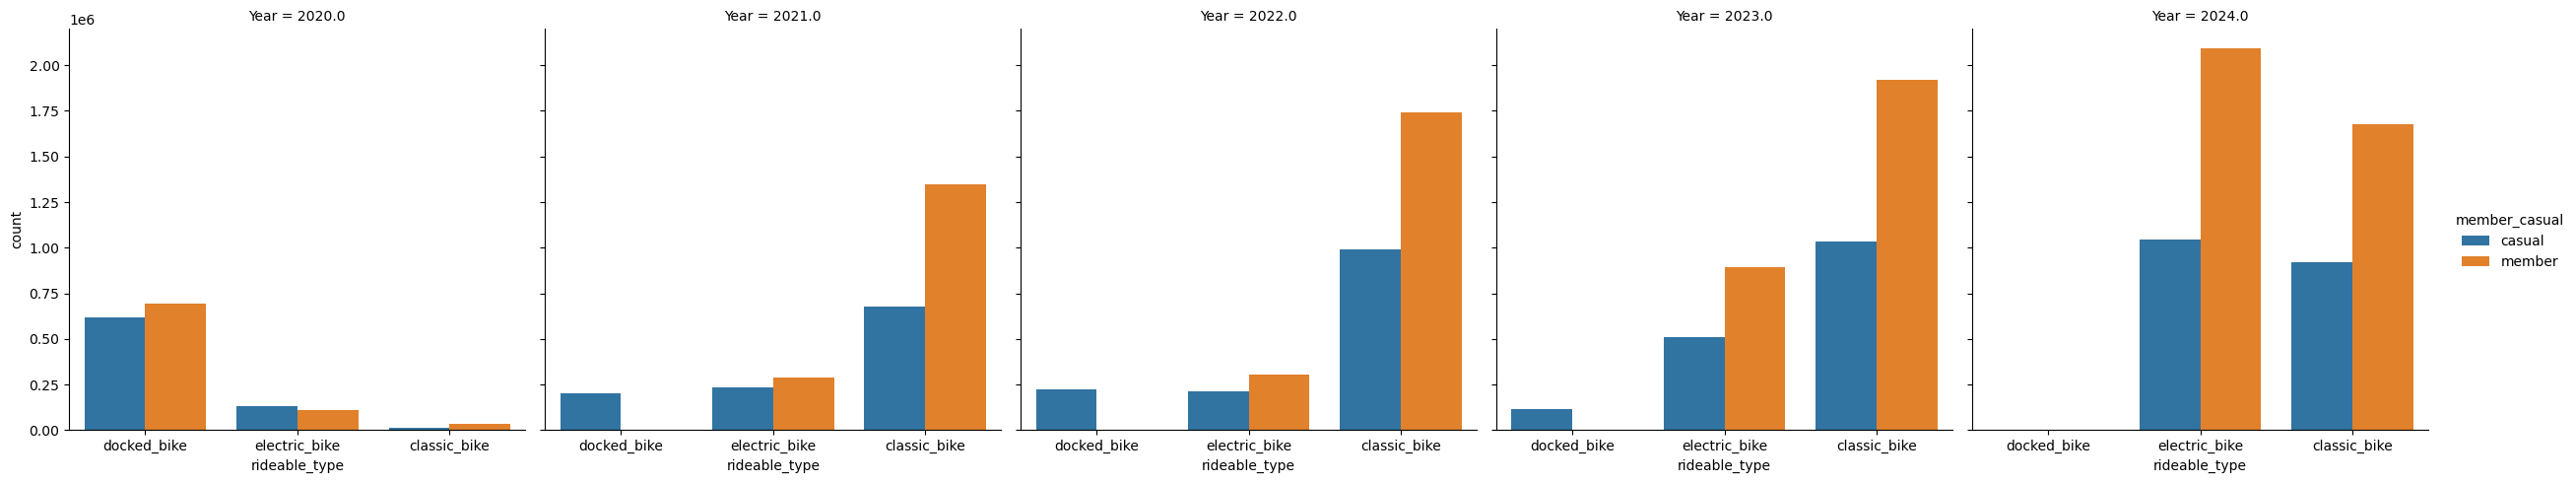

In [78]:

sns.catplot(x ='rideable_type', data = df, kind = 'count', col = 'Year', hue = 'member_casual')
plt.show()

#### Conclusion: 
Classic bikes were the most popular type of bikes for rent at Capital Bikeshare in 2021 - 2023. However already in 2024 we can see that electric bikes become more popular than classic ones. At the same time popularity of docked bikes dicreased over the years (we do not have all the data for 2020, but can clearly see that docked bikes were the majority that year). Introduciton of electric scooters and increasing popularity of electric bikes show that users that rent bikes tend to prefer renting 'non traditional', electric transportation types. 
Member users tend to have more trips in all categories.

#### Question #2: Boxplot of ride length depending on the membership type

Text(0.5, 1.0, 'Boxplot of Ride Length Distribution')

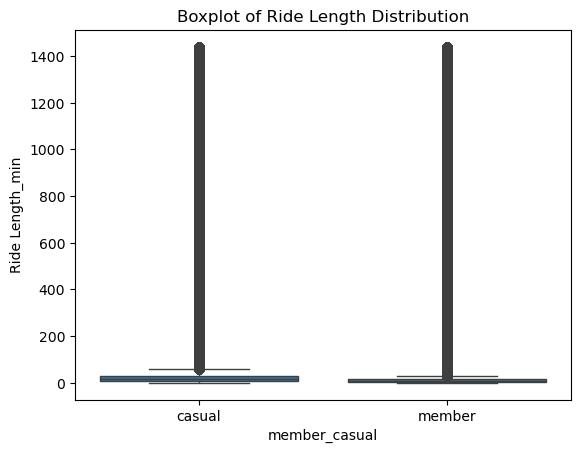

In [81]:
sns.boxplot(x = df['member_casual'], y = df['Ride Length_min'])
plt.title('Boxplot of Ride Length Distribution')

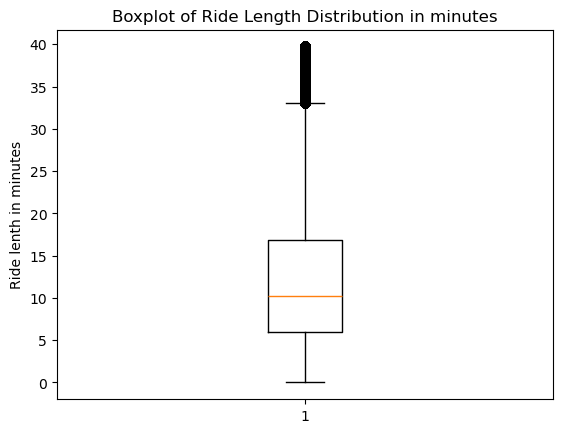

In [82]:
#remove the outliers
q_1 = df['Ride Length_min'].quantile(0.25)
q_2 = df['Ride Length_min'].quantile(0.75)
iqr = q_2 - q_1
low_outliers = q_1 - 1.5 * iqr
upp_outliers = q_2 + 1.5 * iqr
df_no_outliers = df[(df['Ride Length_min'] >= low_outliers) & (df['Ride Length_min'] <= upp_outliers)]
plt.boxplot(df_no_outliers['Ride Length_min'])
plt.title('Boxplot of Ride Length Distribution in minutes')
plt.ylabel('Ride lenth in minutes')
plt.show()

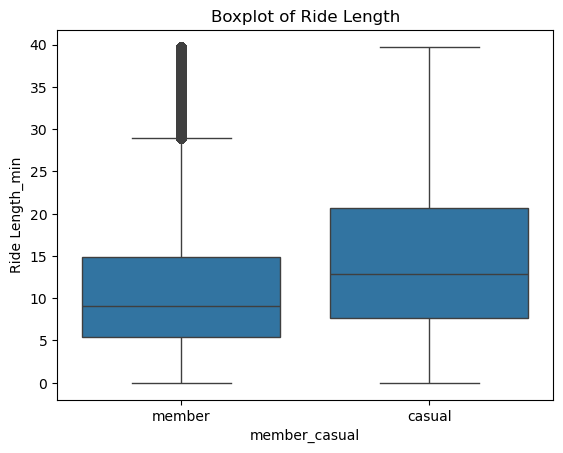

In [83]:
sns.boxplot(x = df_no_outliers['member_casual'], y = df_no_outliers['Ride Length_min'], )
plt.title('Boxplot of Ride Length')
plt.show()

We can see that on average casual users tend to ride longer (both mean and 75th percentile are higher). 
Disclaimer : most of the outliers were removed for the visualisation purposes. 

In [64]:
#find median for ride length for members and for casual riders
df_member = df[df['member_casual'] == 'member']
df_casual = df[df['member_casual'] == 'casual']
memb_med_ride = np.median(df_member['Ride Length_min'])
cas_med_ride = np.median(df_casual['Ride Length_min'])
print(f'Median ride length for members is {memb_med_ride}')
print(f'Median ride length for casual users is {cas_med_ride}')


Median ride length for members is 9.433333333333334
Median ride length for casual users is 15.65


In [97]:
#find number of trips made by members and casual users in 2024 ( we do not have data for all the year yet, but will use it for illustration purposes
numb_trips_memb = len(df_member[df_member['Year']==2024])
numb_trips_cas = len(df_casual[df_casual['Year']==2024])
print(f'Number of trips made by members in 2024 is {numb_trips_memb}')
print(f'Number of trips made by casual users in 2024 is {numb_trips_cas}')

Number of trips made by members in 2024 is 2896020
Number of trips made by casual users in 2024 is 1557453


In [102]:
#sales for a min ride (no initial payments applied) from casual riders (price used will be $0.1 average per minute for classic and electric bikes
cas_s =  numb_trips_cas * 0.1 * cas_med_ride
memb_s = numb_trips_memb * 0.1 * memb_med_ride
print(f'Sales from per minute ride for casual users in 2024 : ${cas_s.round(2)}')
print(f'Sales from per minute ride per member users in 2024 : ${memb_s.round(2)}')

Sales from per minute ride for casual users in 2024 : $2437413.95
Sales from per minute ride per member users in 2024 : $2731912.2


### Conclusion: 
We can see that member riders tend to have mre trips that are shorter. Condifering only sales from per minute ride we can see that memeber users are more profitable for the company.

### Question #2 :Does Capital Bikeshare's recent news tend to be positive, negative or neutral ( descriptive)?
#### Date : 12/09/2024


In [125]:
#source https://www.analyticsvidhya.com/blog/2022/07/sentiment-analysis-using-python/
api_key = '4ec68a27aa0c464489bca233ec260184' # Nataliia's key
newsapi = NewsApiClient(api_key=api_key)
query_1 = '"Capital Bikeshare" AND ("Washington D.C." OR "D.C.")'
articles = newsapi.get_everything(q=query_1, language='en', sort_by='publishedAt')

sentiments = []
for article in articles['articles']:
    text = article['title'] + ' ' + article['description']
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity  # range is -1 (negative) to 1 (positive)
    sentiments.append(sentiment_score)

# Determine overall sentiment
positive = sum(1 for sentiment in sentiments if sentiment > 0)
negative = sum(1 for sentiment in sentiments if sentiment < 0)
neutral = sum(1 for sentiment in sentiments if sentiment == 0)

total_articles = len(sentiments)
positive_percentage = (positive / total_articles) * 100
negative_percentage = (negative / total_articles) * 100
neutral_percentage = (neutral / total_articles) * 100

print(f"Positive Articles: {positive_percentage}%")
print(f"Negative Articles: {negative_percentage}%")
print(f"Neutral Articles: {neutral_percentage}%")

#creating a text with articles's titles and description to use for WordCloud
texts_1 = []
for article in articles['articles']:
    title = article['title']
    description = article['description']
    texts_1.append(title + ' ' + description)
text_data_1 = ' '.join(texts_1)


Positive Articles: 100.0%
Negative Articles: 0.0%
Neutral Articles: 0.0%


In [136]:
#source https://www.analyticsvidhya.com/blog/2022/07/sentiment-analysis-using-python/
query_2 = '"bicycle" & ("Washington D.C." OR "D.C.")'
articles = newsapi.get_everything(q=query_2, language='en', sort_by='publishedAt')

sentiments = []
for article in articles['articles']:
    text = article['title'] + ' ' + article['description']
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity  # range is -1 (negative) to 1 (positive)
    sentiments.append(sentiment_score)

# Determine overall sentiment
positive = sum(1 for sentiment in sentiments if sentiment > 0)
negative = sum(1 for sentiment in sentiments if sentiment < 0)
neutral = sum(1 for sentiment in sentiments if sentiment == 0)

total_articles = len(sentiments)
positive_percentage = (positive / total_articles) * 100
negative_percentage = (negative / total_articles) * 100
neutral_percentage = (neutral / total_articles) * 100

print(f"Positive Articles: {positive_percentage}%")
print(f"Negative Articles: {negative_percentage}%")
print(f"Neutral Articles: {neutral_percentage}%")

#creating a text with articles's titles and description to use for WordCloud
texts_2 = []
for article in articles['articles']:
    title = article['title']
    description = article['description']
    texts_2.append(title + ' ' + description)
text_data_2 = ' '.join(texts_2)

Positive Articles: 5.88235294117647%
Negative Articles: 41.17647058823529%
Neutral Articles: 52.94117647058824%


### What would be the wordcloud for CB and bicycles in general ( based on previously collected news)?

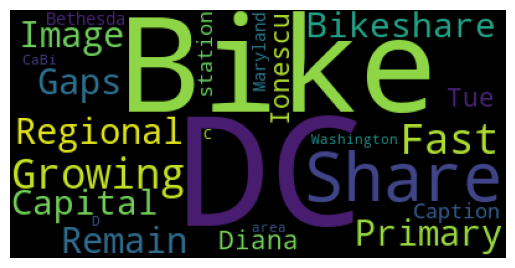

In [139]:
#WordCloud for Capital Bikeshare
wordcloud = WordCloud().generate(text_data_1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

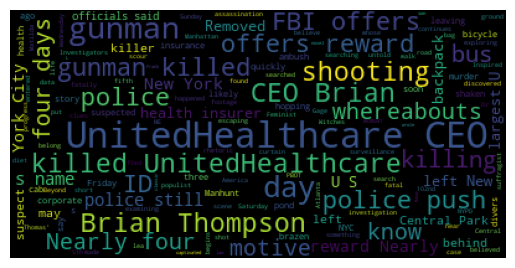

In [141]:
#WordCloud for bicycles in general
wordcloud = WordCloud().generate(text_data_2)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the news as of 12/09/2024 we can see that wordcloud for Capital Bikeshare contains words like Bike, Fast, DC, Share, Growing etc, meaning that none has any specific negative connotation. 

At the same wordcloud for news on bicycles in general has words like 'health', 'CEO', 'shooting', 'police'. Since majority of the news are not related to specifically bikes in DC we can assume that the overal sentiment of these two words in the news search is not positive